## Web Scraping in Python with Beautiful Soup
- based on this [blog post](https://medium.freecodecamp.org/how-to-scrape-websites-with-python-and-beautiful)
 the link might be broken

- another side note: be sure to check the rules of scraping data for each website that you plan to scrape. It's important to stay ethical.

### Goal:
- get a list of inspirational quotes from LDS general conference
- - Here is [blog post](https://www.templesquare.com/blog/top-april-2018-general-conference-quote) of the best quotes

- rules of use for lds.org are found [here](https://www.lds.org/legal/terms?lang=eng)

- usage rules of blog found at beginning of post:

 'Keep special messages from April 2018 General Conference in your minds and hearts with these conference quote designs. You can share them on social media or just save the images to view time and time again. We hope these help you to continue to feel inspiration from LDS Church leaders and the sweet spirit in which they initially gave these messages.'

In [3]:
#libraries
import urllib.request as ul3
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [4]:
#specify the url
# quote_page = 'https://www.entrepreneur.com/article/247213'
quote_page = 'https://www.templesquare.com/blog/top-april-2018-general-conference-quote'

In [5]:
#query the website and return the html to the variable 'page'
page  = ul3.urlopen(quote_page)

In [6]:
#parse the html using beautiful soup and store in variable 'soup'
soup = BeautifulSoup(page,'html.parser')

In [7]:
soup


<!DOCTYPE html>

<html lang="en-US" prefix="og: http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<title>Top 55 General Conference Quotes from April 2018 | Temple Square</title><meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/> <script type="text/javascript">
		var ajaxurl = 'https://www.templesquare.com/wp-admin/admin-ajax.php';
		</script>
<!-- This site is optimized with the Yoast SEO plugin v8.2 - https://yoast.com/wordpress/plugins/seo/ -->
<meta content="Keep special messages from April 2018 General Conference in your hearts and minds with these conference quote designs - share them, save them, remember them" name="description"/>
<link href="https://www.templesquare.com/blog/top-april-2018-general-conference-quotes/" rel="canonical"/>
<meta content="en_US" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Top 55 General Conference Quotes from April 2018 | Temple Square" property="og:title"

In [8]:
# Take out the <div> of name and get its value
name_box = soup.find_all('p')

In [9]:
name_box[-100:-3]

[<p>“I testify that Jesus Christ is our resurrected and living Redeemer, and I promise that He will guide, protect and strengthen us as we walk in the meekness of His spirit.”</p>,
 <p><a href="https://www.templesquare.com/wp-content/uploads/2018/04/Quotes-Sp2018-Conf-07.jpg" rel="attachment wp-att-22651"><img alt="Best April 2018 General Conference Quotes - David A. Bednar" class="aligncenter size-full wp-image-22651" data-jpibfi-post-excerpt="" data-jpibfi-post-title="Top April 2018 General Conference Quotes" data-jpibfi-post-url="https://www.templesquare.com/blog/top-april-2018-general-conference-quotes/" data-jpibfi-src="https://www.templesquare.com/wp-content/uploads/2018/04/Quotes-Sp2018-Conf-07.jpg" height="441" sizes="(max-width: 603px) 100vw, 603px" src="https://www.templesquare.com/wp-content/uploads/2018/04/Quotes-Sp2018-Conf-07.jpg" srcset="https://www.templesquare.com/wp-content/uploads/2018/04/Quotes-Sp2018-Conf-07.jpg 603w, https://www.templesquare.com/wp-content/uploads

In [10]:
counter = 0
for i in name_box:
    counter += 1
    print(counter)
    print(i.text.strip())
    
# print(name_box[0].text)

1
Temple Square
2
April 7, 2018
3
Keep special messages from April 2018 General Conference in your minds and hearts with these conference quote designs. You can share them on social media or just save the images to view time and time again. We hope these help you to continue to feel inspiration from LDS Church leaders and the sweet spirit in which they initially gave these messages.
4

5
Precious Gifts from God | M. Russell Ballard
6
“If we have faith as small as a mustard seed, the Lord can help us remove the mountains of discouragement and doubt in the tasks ahead of us as we serve with God’s children.”
7
“Life can be filled with faith, joy, happiness, hope, and love when we exercise the smallest amount of real faith in Christ, even a mustard seed of faith.”
8

9

10
Am I a Child of God? | Brian K. Taylor
11
“To mothers, especially young mothers…know that God sanctifies your most difficult days.”
12
“When you feel hurt, lost, scared, upset, sad, hungry or hopelessly abandoned in life

In [11]:
#make an array that contains all the quotes
all_quotes = []

#the conditions help to filter out the blanks and some of the junk

for i in name_box:
    if (i.text.strip() != '') and len(i.text.strip()) > 10:
        all_quotes.append(i.text.strip())

In [12]:
#after inspection we need to 
#truncate the ends to drop unwanted intro/conclusion remarks from blogger
aq_clean = all_quotes[3:-7]
aq_clean

['Precious Gifts from God | M. Russell Ballard',
 '“If we have faith as small as a mustard seed, the Lord can help us remove the mountains of discouragement and doubt in the tasks ahead of us as we serve with God’s children.”',
 '“Life can be filled with faith, joy, happiness, hope, and love when we exercise the smallest amount of real faith in Christ, even a mustard seed of faith.”',
 'Am I a Child of God? | Brian K. Taylor',
 '“To mothers, especially young mothers…know that God sanctifies your most difficult days.”',
 '“When you feel hurt, lost, scared, upset, sad, hungry or hopelessly abandoned in life’s extremities, open the Book of Mormon and you will come to know God will never desert us.”',
 '“Coming to know our Father changes everything, especially our hearts as his gentle spirit confirms our true identity and great worth in His sight.”',
 'Even as Christ Forgives You, So Also Do Ye | Larry J. Echo Hawk',
 '“Please also remember that an essential element of forgiveness includes

In [13]:
# general cleaning of the data

#drop blank entries
#add titles and speakers to a list
#add quotes to a list

#lists talks speakers and quotes
talks_and_speakers = [] #this will be split up later
just_quotes = []

for i in range(len(aq_clean)):
#     print(i)
    if '|' in aq_clean[i]:
        current_talk_speaker = aq_clean[i]
    else:
        current_quote = aq_clean[i]
        just_quotes.append(current_quote)
        talks_and_speakers.append(current_talk_speaker)
    
print(len(talks_and_speakers))
print(len(just_quotes))
        

55
55


In [14]:
#now lets clean this up a little bit with pandas
df_raw = pd.DataFrame({'TS': talks_and_speakers,
                       'Quote': just_quotes})
print(df_raw.shape)
df_raw.head()

(55, 2)


,TS,Quote
0,Precious Gifts from God | M. Russell Ballard,"“If we have faith as small as a mustard seed, ..."
1,Precious Gifts from God | M. Russell Ballard,"“Life can be filled with faith, joy, happiness..."
2,Am I a Child of God? | Brian K. Taylor,"“To mothers, especially young mothers…know tha..."
3,Am I a Child of God? | Brian K. Taylor,"“When you feel hurt, lost, scared, upset, sad,..."
4,Am I a Child of God? | Brian K. Taylor,"“Coming to know our Father changes everything,..."


In [15]:
#then split apart talk and speaker into two separate columns
#split up talk and speaker into separate columns
df_raw['Talk'],df_raw['Speaker'] = df_raw['TS'].str.split('|',1).str
#rename test to Quotes
# df_raw = df_raw.rename(index = str,columns={'test': 'Quotes'})
df_clean = df_raw.drop(["TS"],axis = 1)[['Speaker','Talk','Quote']]
# df_raw.head()

In [16]:
print(df_clean.shape)
df_clean

(55, 3)


,Speaker,Talk,Quote
0,M. Russell Ballard,Precious Gifts from God,"“If we have faith as small as a mustard seed, ..."
1,M. Russell Ballard,Precious Gifts from God,"“Life can be filled with faith, joy, happiness..."
2,Brian K. Taylor,Am I a Child of God?,"“To mothers, especially young mothers…know tha..."
3,Brian K. Taylor,Am I a Child of God?,"“When you feel hurt, lost, scared, upset, sad,..."
4,Brian K. Taylor,Am I a Child of God?,"“Coming to know our Father changes everything,..."
5,Larry J. Echo Hawk,"Even as Christ Forgives You, So Also Do Ye",“Please also remember that an essential elemen...
6,Gary E. Stevenson,The Heart of a Prophet,"“Interestingly, as President Nelson’s call to ..."
7,Lynn G. Robbins,Until Seventy Times Seven,"“Our success, then, isn’t going from failure t..."
8,Lynn G. Robbins,Until Seventy Times Seven,"“I am eternally grateful for the patience, lov..."
9,Neil L. Andersen,The Prophet of God,“As you are humble in following the counsel of...


### Done! (If I want to be)

#### Now let's do some simple EDA

In [17]:
import seaborn as sns

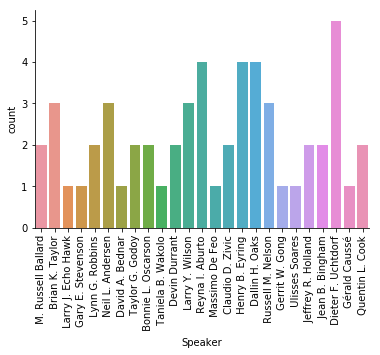

In [18]:
g = sns.countplot(df_clean.Speaker)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g
sns.despine()

## make a similar plot with with most popular non-filler words
- the first step for this is to remove the punctuation from the quotes so that we can get a count of the raw words

In [39]:
# df_clean.Quote.str.replace('[^\w\s]','')

In [50]:
#remove punctuation and special characters
raw_quotes = df_clean.Quote.str.replace('[^\w\s]','')

#cast to a list and then combine into one giant string
raw_quote_list = list(raw_quotes)
all_words = " ".join(raw_quote_list)

#make all lower case and then split up by individual words
all_words = all_words.lower().split(' ')
all_words

['if',
 'we',
 'have',
 'faith',
 'as',
 'small',
 'as',
 'a',
 'mustard',
 'seed',
 'the',
 'lord',
 'can',
 'help',
 'us',
 'remove',
 'the',
 'mountains',
 'of',
 'discouragement',
 'and',
 'doubt',
 'in',
 'the',
 'tasks',
 'ahead',
 'of',
 'us',
 'as',
 'we',
 'serve',
 'with',
 'gods',
 'children',
 'life',
 'can',
 'be',
 'filled',
 'with',
 'faith',
 'joy',
 'happiness',
 'hope',
 'and',
 'love',
 'when',
 'we',
 'exercise',
 'the',
 'smallest',
 'amount',
 'of',
 'real',
 'faith',
 'in',
 'christ',
 'even',
 'a',
 'mustard',
 'seed',
 'of',
 'faith',
 'to',
 'mothers',
 'especially',
 'young',
 'mothersknow',
 'that',
 'god',
 'sanctifies',
 'your',
 'most',
 'difficult',
 'days',
 'when',
 'you',
 'feel',
 'hurt',
 'lost',
 'scared',
 'upset',
 'sad',
 'hungry',
 'or',
 'hopelessly',
 'abandoned',
 'in',
 'lifes',
 'extremities',
 'open',
 'the',
 'book',
 'of',
 'mormon',
 'and',
 'you',
 'will',
 'come',
 'to',
 'know',
 'god',
 'will',
 'never',
 'desert',
 'us',
 'coming'

In [31]:
#import counter to make count of all the words
from collections import Counter

In [53]:
word_counts = Counter(all_words)
word_counts.most_common(20)

[('the', 68),
 ('to', 64),
 ('of', 53),
 ('and', 50),
 ('our', 35),
 ('we', 33),
 ('in', 24),
 ('that', 24),
 ('us', 20),
 ('a', 19),
 ('you', 16),
 ('is', 16),
 ('be', 14),
 ('are', 14),
 ('as', 13),
 ('his', 13),
 ('i', 13),
 ('will', 12),
 ('have', 11),
 ('can', 11)]

In [61]:
words_df = pd.DataFrame({'words' : all_words})
words_df.head()
print(len(words_df.words.unique()))

549


In [66]:
words_df.words.value_counts()

the            68
to             64
of             53
and            50
our            35
we             33
in             24
that           24
us             20
a              19
you            16
is             16
are            14
be             14
his            13
i              13
as             13
will           12
can            11
have           11
not            11
with            9
all             9
christ          8
for             8
when            8
god             7
know            7
one             7
need            7
               ..
dont            1
casualness      1
upset           1
sustain         1
includes        1
eyes            1
avoidable       1
ahead           1
ways            1
vineyard        1
ended           1
institution     1
mine            1
example         1
sins            1
immortality     1
effort          1
today           1
itwe            1
typhoon         1
increase        1
fiercest        1
essential       1
paths           1
divinely  

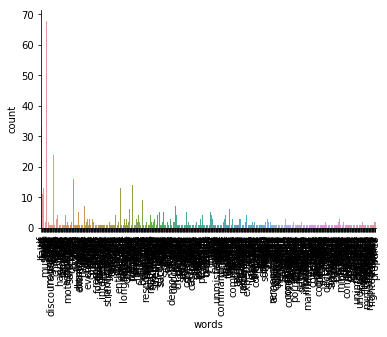

In [59]:
word_plot = sns.countplot(words_df.words)
word_plot.set_xticklabels(word_plot.get_xticklabels(), rotation=90)
word_plot
sns.despine()

### Oops, What I did here turned out to be unneccessary, but it was still a good learing experience

It turns out that I didn't need to merge the quotes like I did below...

The quotes are organized by speaker and talk, and so all the quotes from one speaker don't necessarily belong with each other.

It was a great learning exercise though!

In [ ]:
#merge quotes that are from the same talk

#there is probably a better way to do this
df_raw['test'] = ''
df_raw['test'] = df_raw[['Quote','TS','test']].groupby(['TS'])['Quote'].transform(lambda x: ' '.join(x))
df_raw = df_raw[['TS','test']].drop_duplicates()
df_raw.head()

In [ ]:
df_raw.test[0]

In [ ]:
# #split up talk and speaker into separate columns
# df_raw['Talk'],df_raw['Speaker'] = df_raw['TS'].str.split('|',1).str

# #rename test to Quotes
# df_raw = df_raw.rename(index = str,columns={'test': 'Quotes'})
# df_clean = df_raw.drop(["TS"],axis = 1)[['Speaker','Talk','Quotes']]

In [ ]:
# print(df_clean.shape)
# df_clean

In [ ]:
list(df_raw.columns.values)

In [ ]:
df_raw[['Speaker','Talk','Quotes']]

In [ ]:
# once I have made a quote data set, I should scrape landscape images, 
# then I can learn to automate the making of conference picture quotes!

# I probably couldn't sell these legally, but it would be a cool 
# learning experience for sure!

#### Here we'll get speaker names to get a tally of how many talks were given by each speaker
- it's probably easier to do this by hand, but it will be a good learning experience
- [here is the link](https://www.lds.org/general-conference?lang=eng)

In [27]:
speaker_url = 'https://www.lds.org/general-conference?lang=eng'
speaker_page  = ul3.urlopen(speaker_url)
soup2 = BeautifulSoup(speaker_page,'html.parser')

In [28]:
soup2

<html><body><center><h1><b>Not Available</b></h1><i>This page is unavailable.  Error code: 1-1919</i></center></body></html>

### Scratch Code or Old Code

In [ ]:
# general cleaning of the data

#drop blank entries
#add titles and speakers to a list
#add quotes to a list


talks_and_speakers = []
just_quotes = []
for i in all_quotes:
    if '|' in i:
        talks_and_speakers.append(i)
    else:
        just_quotes.append(i)
        
# I need a way to map speakers to the quotes for multiline quotes
print(len(talks_and_speakers))
print(len(just_quotes))
        

In [ ]:
#example of what I want
import pandas as pd
speakers = ['Bob','Bob','Bob','Bob','Sally','Sally', 'Jo', 'Jo', 'Jo']
quotes = ['abc','def','ghi','jkl','123','456','one','two','three']
print(len(speakers),len(quotes))

some_df = pd.DataFrame({'Speakers': speakers,
                        'Quotes': quotes})
some_df

In [ ]:
import pandas as pd
speakers = ['Bob','Sally', 'Jo']
quotes = ['abc def ghi jkl','123 456','one two three']
desired_df = pd.DataFrame({'Speakers': speakers,
                        'Quotes': quotes})
desired_df